In [40]:
# https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ml-25m/ml-25m/ratings.csv', nrows=100000)

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
movie_titles = pd.read_csv('ml-25m/ml-25m/movies.csv')

In [5]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df = pd.merge(df, movie_titles, on='movieId')

In [7]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [8]:
df.describe()

,userId,movieId,rating,timestamp
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,387.633370,20861.816250,3.585315,1.202491e+09
std,220.610909,38208.379944,1.041537,2.348316e+08
min,1.000000,1.000000,0.500000,8.281634e+08
25%,187.000000,1089.000000,3.000000,9.853806e+08
50%,406.000000,2719.000000,4.000000,1.170491e+09
75%,572.000000,8370.000000,4.000000,1.439794e+09
max,757.000000,206272.000000,5.000000,1.574254e+09


In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [10]:
ratings.head()

,rating
title,
$5 a Day (2008),4.0
'71 (2014),2.5
'Round Midnight (1986),4.0
'Salem's Lot (2004),3.0
'Til There Was You (1997),2.5


In [11]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

In [12]:
ratings.head()

,rating,number_of_ratings
title,,
$5 a Day (2008),4.0,1
'71 (2014),2.5,1
'Round Midnight (1986),4.0,1
'Salem's Lot (2004),3.0,2
'Til There Was You (1997),2.5,2


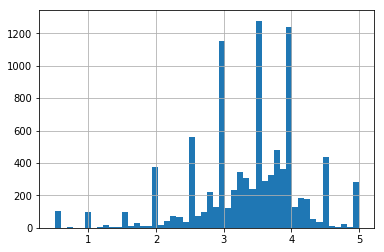

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

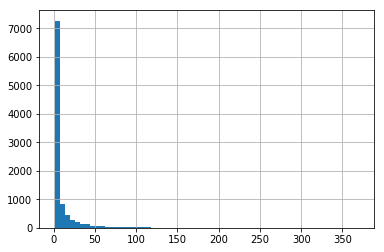

In [14]:
ratings['number_of_ratings'].hist(bins=60)

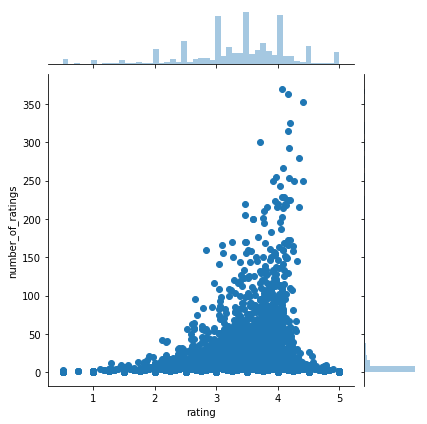

In [15]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [16]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,$5 a Day (2008),'71 (2014),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Dis)Honesty: The Truth About Lies (2015),*batteries not included (1987),...,xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986),Кентервильское привидение (1970),Когда зажигаются ёлки (1950),Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),Принцесса и Людоед (1977)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.072973,370
Pulp Fiction (1994),4.162534,363
"Shawshank Redemption, The (1994)",4.414773,352
"Silence of the Lambs, The (1991)",4.189231,325
"Matrix, The (1999)",4.169841,315
Jurassic Park (1993),3.705000,300
Star Wars: Episode IV - A New Hope (1977),4.183219,292
Schindler's List (1993),4.339286,280
Braveheart (1995),4.080524,267


In [18]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [19]:
AFO_user_rating.head()
contact_user_rating.head()

userId
1    NaN
2    5.0
3    4.0
4    NaN
5    NaN
Name: Contact (1997), dtype: float64

In [20]:
TheMatrix_user_rating = movie_matrix['Matrix, The (1999)']

In [21]:
TheMatrix_user_rating.head()

userId
1    NaN
2    5.0
3    4.0
4    4.5
5    NaN
Name: Matrix, The (1999), dtype: float64

In [22]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [23]:
similar_to_thematrix = movie_matrix.corrwith(TheMatrix_user_rating)

In [24]:
similar_to_contact.head()

title
$5 a Day (2008)             NaN
'71 (2014)                  NaN
'Round Midnight (1986)      NaN
'Salem's Lot (2004)         NaN
'Til There Was You (1997)   NaN
dtype: float64

In [25]:
similar_to_thematrix.head()

title
$5 a Day (2008)             NaN
'71 (2014)                  NaN
'Round Midnight (1986)      NaN
'Salem's Lot (2004)         NaN
'Til There Was You (1997)   NaN
dtype: float64

In [33]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
"'burbs, The (1989)",-0.174078
(500) Days of Summer (2009),0.729537
*batteries not included (1987),-1.000000
10 Cloverfield Lane (2016),1.000000
10 Things I Hate About You (1999),0.060998


In [34]:
corr_TheMatrix = pd.DataFrame(similar_to_thematrix, columns=['correlation'])
corr_TheMatrix.dropna(inplace=True)
corr_TheMatrix.head()

,correlation
title,
"'burbs, The (1989)",0.747958
(500) Days of Summer (2009),0.276432
*batteries not included (1987),-1.000000
...And Justice for All (1979),1.000000
10 (1979),-0.188982


In [35]:
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_TheMatrix = corr_TheMatrix.join(ratings['number_of_ratings'])

In [36]:
corr_contact.head()
corr_TheMatrix.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.747958,14
(500) Days of Summer (2009),0.276432,49
*batteries not included (1987),-1.000000,3
...And Justice for All (1979),1.000000,3
10 (1979),-0.188982,6


In [37]:
corr_TheMatrix[corr_TheMatrix['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
"Matrix, The (1999)",1.000000,315
Star Trek: Generations (1994),0.552435,109
Aliens (1986),0.539794,137
Men in Black (a.k.a. MIB) (1997),0.490743,176
Minority Report (2002),0.479271,120
Die Hard: With a Vengeance (1995),0.472803,158
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.463715,149
Cast Away (2000),0.437528,116
Interview with the Vampire: The Vampire Chronicles (1994),0.414265,127


In [39]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Toy Story 2 (1999),0.744210,110
Cast Away (2000),0.710304,116
Spider-Man (2002),0.640158,119
Jerry Maguire (1996),0.605030,116
Babe (1995),0.597215,145
"Monsters, Inc. (2001)",0.585483,151
WALL·E (2008),0.569737,115
Crimson Tide (1995),0.567952,102
Dead Poets Society (1989),0.550949,111
